In [27]:
import os
import glob
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

# Fire
## Load results

In [21]:
results_fire = []
for f in glob.glob('./results/fire/*.results.parquet'):
    source, *_, model, _, _ = os.path.basename(f).split('.')
    data = pd.read_csv('./source/fire/{}.filtered.csv'.format(source))
    result = pd.read_parquet(f)
    assert np.alltrue(result['trues'] == data.loc[result['test']]['Level 2'].values)
    result['trues'] = data.loc[result['test']]['Level 2'].values
    result['source'] = source
    result['model'] = model
    results_fire.append(result)
    
results_fire = pd.concat(results_fire)

In [22]:
results_fire.head()

,fold,test,preds,trues,source,model,scores
0,0,5,LIT,LIT,flam,SVC,NaN
1,0,9,MET,MET,flam,SVC,NaN
2,0,42,MET,MET,flam,SVC,NaN
3,0,51,LIT,LIT,flam,SVC,NaN
4,0,56,LIT,LIT,flam,SVC,NaN


## Plot results

In [23]:
results_fire = results_fire.groupby(['fold', 'source', 'model']).apply(
    lambda g: pd.Series(
                        {'precision': metrics.precision_score(g['trues'], g['preds'], pos_label='MET'),
                         'accuracy': metrics.accuracy_score(g['trues'], g['preds']),
                         'recall': metrics.recall_score(g['trues'], g['preds'], pos_label='MET'),
                         'f1': metrics.f1_score(g['trues'], g['preds'], pos_label='MET')}
                       )
).reset_index()

In [24]:
results_fire_long = pd.melt(
    results_fire, 
    # identify single observation
    id_vars=['fold', 'model', 'source'], 
    # these are the columns we care about
    value_vars=['precision', 'recall', 'f1', 'accuracy'], 
    # target column name
    var_name='metric', 
    # value column name
    value_name='score')

In [25]:
results_fire_long = results_fire_long.replace({"model": {'metric-finetune': 'metric'}})

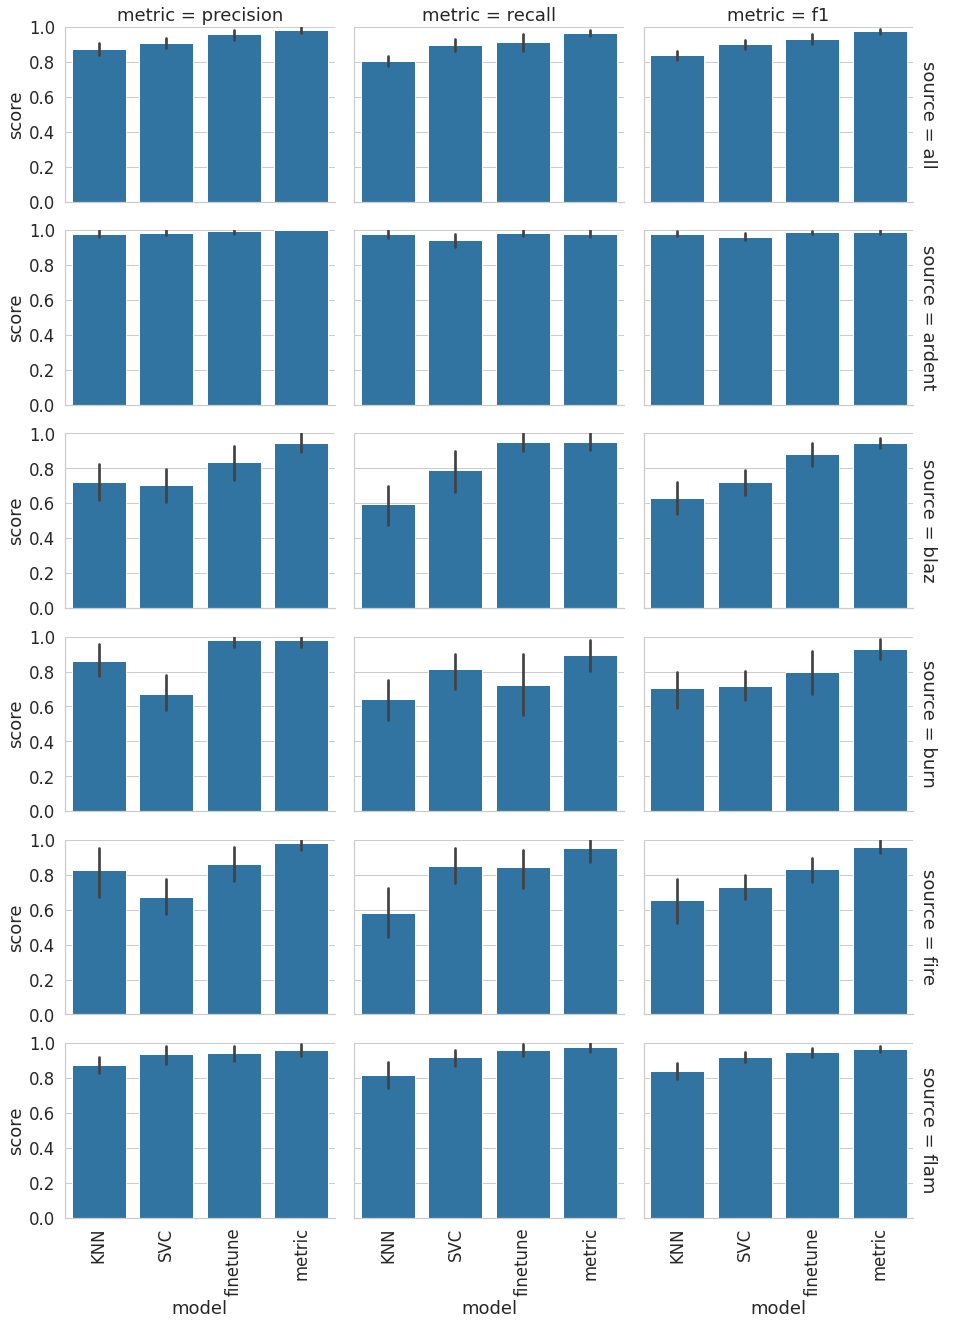

In [29]:
with sns.axes_style("whitegrid"), sns.plotting_context("notebook", font_scale=1.5):
    g = sns.FacetGrid(results_fire_long[results_fire_long['metric']!='accuracy'],
                      row='source', col='metric', margin_titles=True, aspect=1.5)
    g.map_dataframe(sns.barplot, x='model', y='score')
    g.add_legend()
    g.set(ylim=(0., 1))
    for axes in g.axes.flat:
        _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)

# Scent
## Load results

In [37]:
results_scent = []
for f in glob.glob('./results/scent/*results.parquet'):
    print(f)
    source, *_, model, _, _ = os.path.basename(f).split('.')
    data = pd.read_csv('./source/scent/{}.csv'.format(source))
    result = pd.read_parquet(f)
    assert np.alltrue(result['trues'] == data.loc[result['test']]['Role'].values)
    result['trues'] = data.loc[result['test']]['Role'].values
    result['source'] = source
    result['model'] = model
    results_scent.append(result)
results_scent = pd.concat(results_scent)

./results/scent/geur.metric-finetune.results.parquet
./results/scent/geur.finetune.results.parquet
./results/scent/reuk.metric-finetune.results.parquet
./results/scent/geur.embeddings.KNN.results.parquet
./results/scent/reuk.finetune.results.parquet
./results/scent/reuk.embeddings.SVC.results.parquet
./results/scent/geur.embeddings.SVC.results.parquet
./results/scent/reuk.embeddings.KNN.results.parquet


## Plot results

In [38]:
results_scent = results_scent.groupby(['fold', 'source', 'model']).apply(
    lambda g: pd.Series(
                        {'f1 macro': metrics.f1_score(g['trues'], g['preds'], average='macro'),
                         'f1 micro': metrics.f1_score(g['trues'], g['preds'], average='micro'),
                         'accuracy': metrics.accuracy_score(g['trues'], g['preds'])}
                       )
).reset_index()

In [39]:
results_scent_long = pd.melt(
    results_scent, 
    # identify single observation
    id_vars=['fold', 'model', 'source'], 
    # these are the columns we care about
    value_vars=['f1 macro', 'f1 micro', 'accuracy'], 
    # target column name
    var_name='metric', 
    # value column name
    value_name='score')

In [40]:
results_scent_long = results_scent_long.replace({"model": {'metric-finetune': 'metric'}})

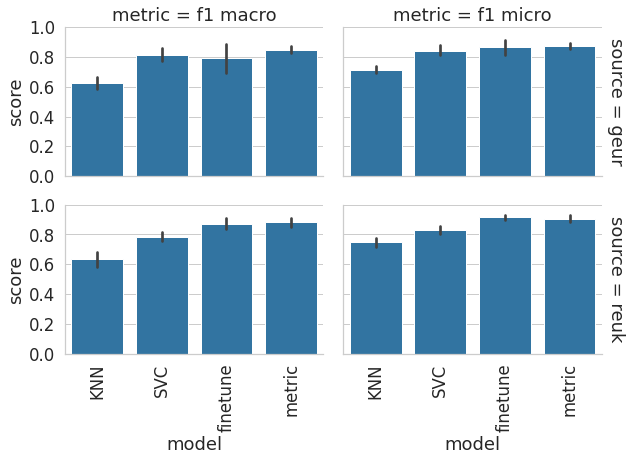

In [42]:
with sns.axes_style("whitegrid"), sns.plotting_context("notebook", font_scale=1.5):
    g = sns.FacetGrid(results_scent_long[results_scent_long['metric']!='accuracy'],
                      row='source', col='metric', margin_titles=True, aspect=1.5)
    g.map_dataframe(sns.barplot, x='model', y='score')
    g.add_legend()
    g.set(ylim=(0., 1))
    for axes in g.axes.flat:
        _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)

# Mass and Weight
## Load results

In [44]:
results_mass = []
for f in glob.glob('./results/mass-and-weight/*parquet'):
    source, *_, model, _, _ = os.path.basename(f).split('.')
    data = pd.read_csv('./source/mass-and-weight/{}.filtered.csv'.format(source))
    result = pd.read_parquet(f)
    assert np.alltrue(result['trues'] == data.loc[result['test']]['Sense'].values)
    result['trues'] = data.iloc[result['test']]['Sense'].values
    result['source'] = source
    result['model'] = model
    results_mass.append(result)
results_mass = pd.concat(results_mass)

## Plot results

In [45]:
results_mass = results_mass.groupby(['fold', 'source', 'model']).apply(
    lambda g: pd.Series(
                        {'f1 macro': metrics.f1_score(g['trues'], g['preds'], average='macro'),
                         'accuracy': metrics.accuracy_score(g['trues'], g['preds']),
                         'f1 micro': metrics.f1_score(g['trues'], g['preds'], average='micro')}
                       )
).reset_index()

In [47]:
results_mass_long = pd.melt(
    results_mass, 
    # identify single observation
    id_vars=['fold', 'model', 'source'], 
    # these are the columns we care about
    value_vars=['f1 macro', 'f1 micro', 'accuracy'], 
    # target column name
    var_name='metric', 
    # value column name
    value_name='score')

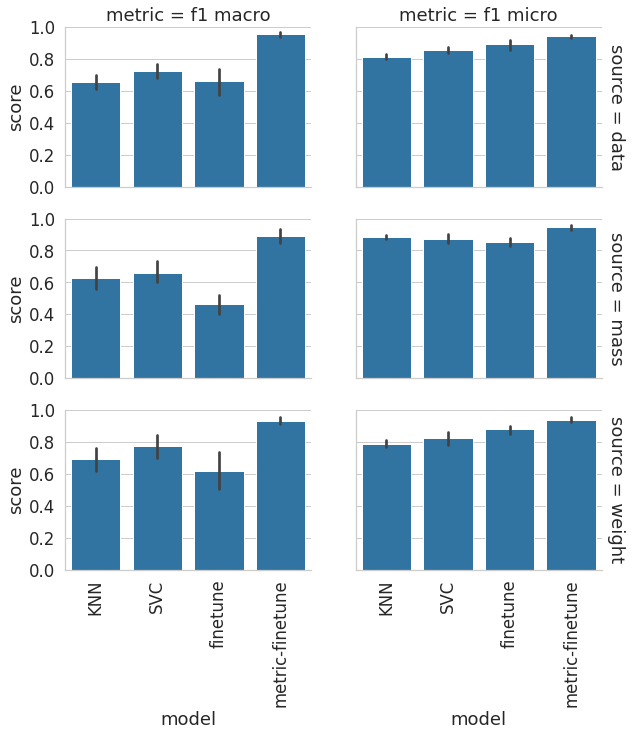

In [48]:
with sns.axes_style("whitegrid"), sns.plotting_context("notebook", font_scale=1.5):
    g = sns.FacetGrid(results_mass_long[results_mass_long['metric']!='accuracy'],
                      row='source', col='metric', margin_titles=True, aspect=1.5)
    g.map_dataframe(sns.barplot, x='model', y='score')
    g.add_legend()
    g.set(ylim=(0., 1))
    for axes in g.axes.flat:
        _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)

# Bayesian Comparison

In [49]:
splits = {}
for model in results_mass['model'].unique():
    subset_mass = results_mass.groupby('model').get_group(model)
    subset_scent = results_scent.groupby('model').get_group(model)
    subset_fire = results_fire.groupby('model').get_group(model)
    splits[model] = np.stack([subset[subset['source']==source]['accuracy'].values 
                              for subset in [subset_mass, subset_scent, subset_fire]
                              for source in subset['source'].unique()])

In [53]:
import nest_asyncio
nest_asyncio.apply()

import baycomp

## Comparing models at different ROPEs

### ROPE=0.01

In [54]:
import itertools
outs = {}
for m1, m2 in itertools.combinations(['SVC', 'KNN', 'finetune', 'metric-finetune'], 2):
    print(m1, m2)
    outs[m1, m2] = baycomp.two_on_multiple(splits[m1], splits[m2], rope=0.01)

SVC KNN


Building: found in cache, done.
Messages from stanc:
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    is provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
Sampling:   0%
Sampling:   0% (400/204000)
Sampling:   1% (1200/204000)
Sampling:   2% (3300/204000)
Sampling:  27% (54300/204000)
Sampling:  51% (104900/204000)
Sampling:  76% (155100/204000)
Sampling: 100% (204000/204000)
Sampling: 100% (204000/204000), done.
Messages received during sampling:
  Gradient evaluation took 0.000129 seconds
  1000 transitions using 10 leapfrog steps per transition 

SVC finetune


Sampling:   0% (200/204000)
Sampling:   0% (400/204000)
Sampling:   0% (700/204000)
Sampling:   1% (1100/204000)
Sampling:  25% (51900/204000)
Sampling:  50% (102700/204000)
Sampling:  75% (153400/204000)
Sampling: 100% (204000/204000)
Sampling: 100% (204000/204000), done.
Messages received during sampling:
  Gradient evaluation took 0.000802 seconds
  1000 transitions using 10 leapfrog steps per transition would take 8.02 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000157 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.57 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.00018 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.8 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000186 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.86 seconds.
  Adjust your expectations accordingly!
Building: found in cache,

SVC metric-finetune


Sampling:   0% (400/204000)
Sampling:   1% (1100/204000)
Sampling:   1% (1900/204000)
Sampling:  26% (52900/204000)
Sampling:  51% (103500/204000)
Sampling:  75% (153800/204000)
Sampling: 100% (204000/204000)
Sampling: 100% (204000/204000), done.
Messages received during sampling:
  Gradient evaluation took 3.8e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.38 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 3.3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.33 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 3.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.34 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 3.1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.31 seconds.
  Adjust your expectations accordingly!
Building: found in cache, done.
Messages from stanc:
 

KNN finetune


Sampling:   0% (700/204000)
Sampling:  25% (51700/204000)
Sampling:  50% (102700/204000)
Sampling:  75% (153700/204000)
Sampling: 100% (204000/204000)
Sampling: 100% (204000/204000), done.
Messages received during sampling:
  Gradient evaluation took 8.7e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.87 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 7.1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.71 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 7.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.79 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 7.5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.75 seconds.
  Adjust your expectations accordingly!
Building: found in cache, done.
Messages from stanc:
    provided, or the prior(s) depend on data variables. In 

KNN metric-finetune


Sampling:   0% (800/204000)
Sampling:  25% (51800/204000)
Sampling:  50% (102800/204000)
Sampling:  75% (153800/204000)
Sampling: 100% (204000/204000)
Sampling: 100% (204000/204000), done.
Messages received during sampling:
  Gradient evaluation took 3.6e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.36 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.3 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.3 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.3 seconds.
  Adjust your expectations accordingly!
Building: found in cache, done.
Messages from stanc:
    provided, or the prior(s) depend on data variables. In the later

finetune metric-finetune


Sampling:   0% (800/204000)
Sampling:  25% (51800/204000)
Sampling:  50% (102800/204000)
Sampling:  75% (153800/204000)
Sampling: 100% (204000/204000)
Sampling: 100% (204000/204000), done.
Messages received during sampling:
  Gradient evaluation took 0.000114 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.14 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000124 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.24 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 8.5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.85 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 9.5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.95 seconds.
  Adjust your expectations accordingly!


In [55]:
outs

{('SVC', 'KNN'): (0.965345, 0.001405, 0.03325),
 ('SVC', 'finetune'): (0.00102, 0.000415, 0.998565),
 ('SVC', 'metric-finetune'): (1e-05, 0.0, 0.99999),
 ('KNN', 'finetune'): (0.001395, 0.0, 0.998605),
 ('KNN', 'metric-finetune'): (3e-05, 0.0, 0.99997),
 ('finetune', 'metric-finetune'): (0.005295, 0.00163, 0.993075)}

### ROPE=0.025

In [56]:
import itertools
outs = {}
for m1, m2 in itertools.combinations(['SVC', 'KNN', 'finetune', 'metric-finetune'], 2):
    print(m1, m2)
    outs[m1, m2] = baycomp.two_on_multiple(splits[m1], splits[m2], rope=0.025)

Building: found in cache, done.
Messages from stanc:
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    is provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
Sampling:   0%


SVC KNN


Sampling:   0% (500/204000)
Sampling:   1% (1700/204000)
Sampling:  26% (52700/204000)
Sampling:  51% (103700/204000)
Sampling:  76% (154200/204000)
Sampling: 100% (204000/204000)
Sampling: 100% (204000/204000), done.
Messages received during sampling:
  Gradient evaluation took 9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.9 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000102 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.02 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 7.7e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.77 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000128 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.28 seconds.
  Adjust your expectations accordingly!
Building: found in cache, done.
Messages from stanc:
    provided, or the prior(s) d

SVC finetune


Sampling:   0% (200/204000)
Sampling:   0% (400/204000)
Sampling:   0% (800/204000)
Sampling:   1% (1200/204000)
Sampling:  25% (52000/204000)
Sampling:  50% (102800/204000)
Sampling:  75% (153400/204000)
Sampling: 100% (204000/204000)
Sampling: 100% (204000/204000), done.
Messages received during sampling:
  Gradient evaluation took 3.8e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.38 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 2.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.29 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 3.2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.32 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4.2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.42 seconds.
  Adjust your expectations accordingly!
Building: found in cache, d

SVC metric-finetune


Sampling:   0% (300/204000)
Sampling:   0% (800/204000)
Sampling:   1% (1400/204000)
Sampling:  12% (23700/204000)
Sampling:  22% (45600/204000)
Sampling:  47% (96100/204000)
Sampling:  72% (146500/204000)
Sampling:  86% (175200/204000)
Sampling: 100% (204000/204000)
Sampling: 100% (204000/204000), done.
Messages received during sampling:
  Gradient evaluation took 3.6e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.36 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 8.1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.81 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 2.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.29 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 3.8e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.38 seconds.
  Adjust your expectations accordin

KNN finetune


Sampling:   0% (600/204000)
Sampling:  25% (51600/204000)
Sampling:  50% (102600/204000)
Sampling:  75% (153600/204000)
Sampling: 100% (204000/204000)
Sampling: 100% (204000/204000), done.
Messages received during sampling:
  Gradient evaluation took 8.7e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.87 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.3 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 3.1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.31 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 3.8e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.38 seconds.
  Adjust your expectations accordingly!
Building: found in cache, done.
Messages from stanc:
    provided, or the prior(s) depend on data variables. In the

KNN metric-finetune


Sampling:   0% (900/204000)
Sampling:  25% (51900/204000)
Sampling:  50% (102900/204000)
Sampling:  75% (153900/204000)
Sampling: 100% (204000/204000)
Sampling: 100% (204000/204000), done.
Messages received during sampling:
  Gradient evaluation took 8.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.89 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 8.5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.85 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 7.6e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.76 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 7.3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.73 seconds.
  Adjust your expectations accordingly!
Building: found in cache, done.
Messages from stanc:
    provided, or the prior(s) depend on data variables. In 

finetune metric-finetune


Sampling:   0% (500/204000)
Sampling:  24% (49100/204000)
Sampling:  49% (100100/204000)
Sampling:  74% (151100/204000)
Sampling:  99% (201600/204000)
Sampling: 100% (204000/204000)
Sampling: 100% (204000/204000), done.
Messages received during sampling:
  Gradient evaluation took 8.5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.85 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000108 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.08 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000106 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.06 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000174 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.74 seconds.
  Adjust your expectations accordingly!


In [57]:
outs

{('SVC', 'KNN'): (0.795205, 0.18579, 0.019005),
 ('SVC', 'finetune'): (0.000455, 0.063655, 0.93589),
 ('SVC', 'metric-finetune'): (1e-05, 0.0, 0.99999),
 ('KNN', 'finetune'): (0.00137, 0.000485, 0.998145),
 ('KNN', 'metric-finetune'): (3e-05, 0.0, 0.99997),
 ('finetune', 'metric-finetune'): (0.00186, 0.18824, 0.8099)}

### ROPE=0.05

In [58]:
import itertools
outs = {}
for m1, m2 in itertools.combinations(['SVC', 'KNN', 'finetune', 'metric-finetune'], 2):
    print(m1, m2)
    outs[m1, m2] = baycomp.two_on_multiple(splits[m1], splits[m2], rope=0.05)

Building: found in cache, done.
Messages from stanc:
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    is provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
Sampling:   0%


SVC KNN


Sampling:   0% (500/204000)
Sampling:   5% (10900/204000)
Sampling:  30% (61900/204000)
Sampling:  55% (112900/204000)
Sampling:  80% (163400/204000)
Sampling: 100% (204000/204000)
Sampling: 100% (204000/204000), done.
Messages received during sampling:
  Gradient evaluation took 3.8e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.38 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 3.2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.32 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 3.8e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.38 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 2.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.29 seconds.
  Adjust your expectations accordingly!
Building: found in cache, done.
Messages from stanc:
    provided, or the prior(s)

SVC finetune


Sampling:   0% (300/204000)
Sampling:   0% (700/204000)
Sampling:   1% (1300/204000)
Sampling:  26% (52300/204000)
Sampling:  50% (103000/204000)
Sampling:  75% (153600/204000)
Sampling: 100% (204000/204000)
Sampling: 100% (204000/204000), done.
Messages received during sampling:
  Gradient evaluation took 3.6e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.36 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 3.1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.31 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 3.1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.31 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 2.6e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.26 seconds.
  Adjust your expectations accordingly!
Building: found in cache, done.
Messages from stanc:
  

SVC metric-finetune


Sampling:   0% (200/204000)
Sampling:   0% (500/204000)
Sampling:   1% (1100/204000)
Sampling:   1% (1800/204000)
Sampling:  26% (52600/204000)
Sampling:  51% (103300/204000)
Sampling:  75% (153700/204000)
Sampling: 100% (204000/204000)
Sampling: 100% (204000/204000), done.
Messages received during sampling:
  Gradient evaluation took 5.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.54 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.3 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.44 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 2.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.29 seconds.
  Adjust your expectations accordingly!
Building: found in cache, don

KNN finetune


Sampling:   0% (700/204000)
Sampling:  25% (51700/204000)
Sampling:  50% (102700/204000)
Sampling:  75% (153700/204000)
Sampling: 100% (204000/204000)
Sampling: 100% (204000/204000), done.
Messages received during sampling:
  Gradient evaluation took 8.7e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.87 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000103 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.03 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 8.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.89 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 9.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.94 seconds.
  Adjust your expectations accordingly!
Building: found in cache, done.
Messages from stanc:
    provided, or the prior(s) depend on data variables. In

KNN metric-finetune


Sampling:   0% (800/204000)
Sampling:  25% (51800/204000)
Sampling:  50% (102800/204000)
Sampling:  75% (153800/204000)
Sampling: 100% (204000/204000)
Sampling: 100% (204000/204000), done.
Messages received during sampling:
  Gradient evaluation took 8.3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.83 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 8.2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.82 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000118 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.18 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000137 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.37 seconds.
  Adjust your expectations accordingly!
Building: found in cache, done.
Messages from stanc:
    provided, or the prior(s) depend on data variables. I

finetune metric-finetune


Sampling:   0% (600/204000)
Sampling:  25% (51600/204000)
Sampling:  50% (102600/204000)
Sampling:  75% (153600/204000)
Sampling: 100% (204000/204000)
Sampling: 100% (204000/204000), done.
Messages received during sampling:
  Gradient evaluation took 3.5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.35 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.3 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.3 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 3.3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.33 seconds.
  Adjust your expectations accordingly!


In [59]:
outs

{('SVC', 'KNN'): (0.13647, 0.861775, 0.001755),
 ('SVC', 'finetune'): (3e-05, 0.801845, 0.198125),
 ('SVC', 'metric-finetune'): (5e-06, 0.006895, 0.9931),
 ('KNN', 'finetune'): (0.000545, 0.105595, 0.89386),
 ('KNN', 'metric-finetune'): (3e-05, 0.00029, 0.99968),
 ('finetune', 'metric-finetune'): (0.000105, 0.907185, 0.09271)}